In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [3]:
df = pd.read_csv('df_1.csv', index_col=0)
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율
0,동대문구,2022-12-31,84.97,11,2003.0,2022,76500,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
1,구로구,2022-12-31,59.88,4,2011.0,2022,85000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
2,노원구,2022-12-31,41.30,12,1988.0,2022,39000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
3,동대문구,2022-12-31,59.98,12,2011.0,2022,80000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
4,송파구,2022-12-31,100.82,1,1988.0,2022,185000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560753,구로구,2016-01-01,84.85,18,1998.0,2016,30500,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560754,노원구,2016-01-01,59.82,7,2005.0,2016,30800,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560755,서초구,2016-01-01,134.36,12,2005.0,2016,94000,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560756,양천구,2016-01-01,49.99,2,2000.0,2016,21000,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3


### 건물나이 컬럼 생성(연도 - 건축년도) 및 건물나이 결측치 6행 삭제

In [4]:
# 건물나이 컬럼생성
df['건물나이'] = df['연도'] - df['건축년도']

In [5]:
df['건물나이']

0         19.0
1         11.0
2         34.0
3         11.0
4         34.0
          ... 
560753    18.0
560754    11.0
560755    11.0
560756    16.0
560757    25.0
Name: 건물나이, Length: 560758, dtype: float64

In [6]:
# 결측치 확인
df['건물나이'].isnull().sum()

6

In [7]:
# 결측치를 포함하는 행 제거
df = df.dropna(subset=['건물나이'])

### Close 결측치 채우기

In [8]:
# 시계열로 변환
df['계약일_x'] = pd.to_datetime(df['계약일_x'])

In [9]:
df = df.sort_values(by='계약일_x')

In [10]:
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
560757,노원구,2016-01-01,39.96,10,1991.0,2016,18000,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0
560738,성동구,2016-01-01,75.37,10,1990.0,2016,55200,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
560739,금천구,2016-01-01,84.83,3,2002.0,2016,36800,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0
560740,은평구,2016-01-01,101.97,9,2010.0,2016,67600,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0
560741,노원구,2016-01-01,84.59,10,1990.0,2016,30300,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,송파구,2022-12-31,84.71,11,1988.0,2022,138000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0
20,송파구,2022-12-31,84.90,24,2008.0,2022,172000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0
21,동대문구,2022-12-31,84.87,33,0.0,2022,90452,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,2022.0
11,양천구,2022-12-31,64.02,5,1996.0,2022,37000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0


In [11]:
df['Close'].isnull().sum()

167736

In [12]:
df['Close'] = df['Close'].fillna(method='ffill')

In [13]:
# 2016년 이전에 있던 종가는 2015-12-30일의 종가인 1961로 채우기
df['Close'].isnull().sum()

116

In [14]:
# 채우기
df['Close'].fillna(1961.310059, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560752 entries, 560757 to 0
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   자치구명                  560752 non-null  object        
 1   계약일_x                 560752 non-null  datetime64[ns]
 2   건물면적(㎡)               560752 non-null  float64       
 3   층                     560752 non-null  int64         
 4   건축년도                  560752 non-null  float64       
 5   연도                    560752 non-null  int64         
 6   물건금액(만원)              560752 non-null  int64         
 7   Close                 560752 non-null  float64       
 8   월                     560752 non-null  object        
 9   FEDFUNDS              560752 non-null  float64       
 10  국제유가(Dubai) (US$/배럴)  560752 non-null  float64       
 11  부동산 거래량               560752 non-null  object        
 12  국고채?3년(평균)            560752 non-null  float64       
 13 

### 부동산 거래량 ,지우고 type int64로 바꾸기

In [16]:
df['부동산 거래량'].value_counts()

14,446    16443
19,187    15787
34,199    15780
14,388    15430
17,372    14712
          ...  
6,529      1532
7,852      1369
5,791      1331
3,698       852
3,933       734
Name: 부동산 거래량, Length: 84, dtype: int64

In [17]:
# ,지우기
df['부동산 거래량'] = df['부동산 거래량'].str.replace(',', '')

In [18]:
# int로 변환
df = df.astype({'부동산 거래량' : 'int'})

In [19]:
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
560757,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0
560738,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
560739,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0
560740,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0
560741,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,송파구,2022-12-31,84.71,11,1988.0,2022,138000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0
20,송파구,2022-12-31,84.90,24,2008.0,2022,172000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0
21,동대문구,2022-12-31,84.87,33,0.0,2022,90452,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,2022.0
11,양천구,2022-12-31,64.02,5,1996.0,2022,37000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0


In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df.head(1)

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.5,83.3,25.0


In [22]:
# 수치형만 남긴 df1생성
df1 = df.drop(columns = ['건축년도', '연도', '월', '계약일_x', '자치구명'])

In [23]:
# 타겟 변수 마지막으로 이동
target_column = '물건금액(만원)'  # 이동시킬 열 이름
df1 = df1[[col for col in df1.columns if col != target_column] + [target_column]]

In [24]:
df1.head(1)

,건물면적(㎡),층,Close,FEDFUNDS,국제유가(Dubai) (US$/배럴),부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이,물건금액(만원)
0,39.96,10,1961.310059,0.34,26.9,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.5,83.3,25.0,18000


In [25]:
df1.columns

Index(['건물면적(㎡)', '층', 'Close', 'FEDFUNDS', '국제유가(Dubai) (US$/배럴)', '부동산 거래량',
       '국고채?3년(평균)', '국고채?5년(평균)', '국고채?10년(평균)', '회사채?3년(평균)', 'CD?91물(평균)',
       '콜금리(1일물,평균)', '기준금리', 'GDP대비가계부채비율', '건물나이', '물건금액(만원)'],
      dtype='object')

In [26]:
# Person 상관계수
cols = ['건물면적(㎡)', '층', 'Close', 'FEDFUNDS', '국제유가(Dubai) (US$/배럴)', '부동산 거래량',
       '국고채?3년(평균)', '국고채?5년(평균)', '국고채?10년(평균)', '회사채?3년(평균)', 'CD?91물(평균)',
       '콜금리(1일물,평균)', '기준금리', 'GDP대비가계부채비율', '건물나이', '물건금액(만원)']

corr = df1[cols].corr(method = 'pearson')
corr

,건물면적(㎡),층,Close,FEDFUNDS,국제유가(Dubai) (US$/배럴),부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이,물건금액(만원)
건물면적(㎡),1.000000,0.110825,-0.049692,0.011339,-0.068908,0.029574,-0.042157,-0.045204,-0.043432,-0.061568,-0.017156,-0.001028,-0.005276,-0.083179,-0.013536,0.574886
층,0.110825,1.000000,-0.000523,0.009153,0.003722,-0.012943,0.005377,0.004343,0.003134,0.002298,0.006905,0.007865,0.007993,-0.005159,0.092785,0.159205
Close,-0.049692,-0.000523,1.000000,-0.194427,0.517140,-0.115070,0.219956,0.346394,0.428049,0.329356,-0.326415,-0.377699,-0.315389,0.653296,-0.084716,0.193743
FEDFUNDS,0.011339,0.009153,-0.194427,1.000000,0.384783,-0.313128,0.456041,0.385119,0.303248,0.306216,0.701527,0.740738,0.703423,-0.150573,-0.021360,-0.031337
국제유가(Dubai) (US$/배럴),-0.068908,0.003722,0.517140,0.384783,1.000000,-0.471967,0.729826,0.746577,0.707544,0.684885,0.388567,0.332706,0.384594,0.548934,-0.081745,0.158476
부동산 거래량,0.029574,-0.012943,-0.115070,-0.313128,-0.471967,1.000000,-0.649023,-0.614218,-0.581311,-0.438567,-0.585234,-0.595250,-0.620038,0.021040,-0.034947,0.000659
국고채?3년(평균),-0.042157,0.005377,0.219956,0.456041,0.729826,-0.649023,1.000000,0.983961,0.946394,0.871556,0.756883,0.688366,0.744450,0.078782,-0.010128,0.003329
국고채?5년(평균),-0.045204,0.004343,0.346394,0.385119,0.746577,-0.614218,0.983961,1.000000,0.985972,0.904275,0.649950,0.569670,0.631415,0.161864,-0.021396,0.027082
국고채?10년(평균),-0.043432,0.003134,0.428049,0.303248,0.707544,-0.581311,0.946394,0.985972,1.000000,0.885783,0.558735,0.473237,0.537727,0.172737,-0.017785,0.027247
회사채?3년(평균),-0.061568,0.002298,0.329356,0.306216,0.684885,-0.438567,0.871556,0.904275,0.885783,1.000000,0.540604,0.411735,0.474525,0.379761,-0.054996,0.085657


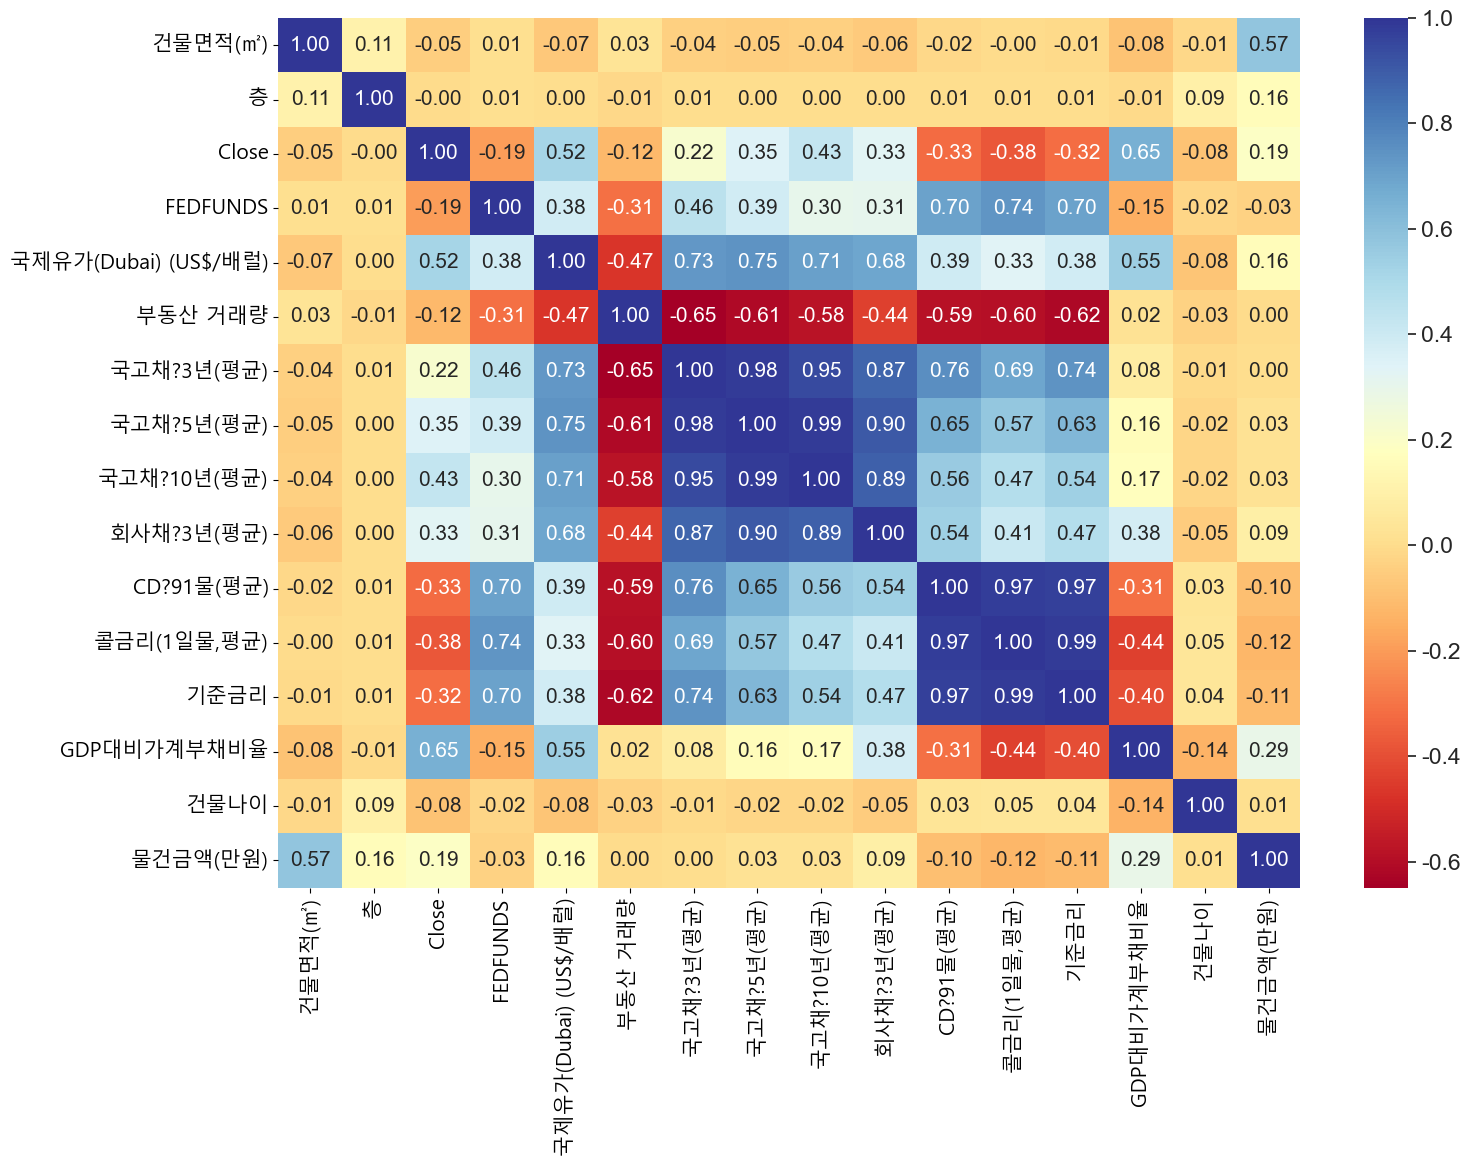

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560752 entries, 0 to 560751
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   자치구명                  560752 non-null  object        
 1   계약일_x                 560752 non-null  datetime64[ns]
 2   건물면적(㎡)               560752 non-null  float64       
 3   층                     560752 non-null  int64         
 4   건축년도                  560752 non-null  float64       
 5   연도                    560752 non-null  int64         
 6   물건금액(만원)              560752 non-null  int64         
 7   Close                 560752 non-null  float64       
 8   월                     560752 non-null  object        
 9   FEDFUNDS              560752 non-null  float64       
 10  국제유가(Dubai) (US$/배럴)  560752 non-null  float64       
 11  부동산 거래량               560752 non-null  int32         
 12  국고채?3년(평균)            560752 non-null  float64       
 13 

In [29]:
# 같은 날짜에 대해 첫 번째 값들만 추출
first_values = df.groupby('계약일_x').first()

In [30]:
df10 = first_values.reset_index()

In [45]:
df10

,계약일_x,GDP대비가계부채비율
0,2016-01-01,83.3
1,2016-01-02,83.3
2,2016-01-03,83.3
3,2016-01-04,83.3
4,2016-01-05,83.3
...,...,...
2551,2022-12-27,105.0
2552,2022-12-28,105.0
2553,2022-12-29,105.0
2554,2022-12-30,105.0


In [31]:
df10 = df10[['계약일_x', 'GDP대비가계부채비율']]

In [32]:
df10['GDP대비가계부채비율'] = df10['GDP대비가계부채비율'].interpolate(method='linear')

In [33]:
merged_df = pd.merge(df, df10, on='계약일_x', how='left')

In [34]:
merged_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율_x,건물나이,GDP대비가계부채비율_y
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0,83.3
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01,0.34,...,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0,83.3
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01,0.34,...,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0,83.3
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01,0.34,...,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0,83.3
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01,0.34,...,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560747,송파구,2022-12-31,84.71,11,1988.0,2022,138000,2236.399902,2022-12,4.10,...,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0,105.0
560748,송파구,2022-12-31,84.90,24,2008.0,2022,172000,2236.399902,2022-12,4.10,...,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0,105.0
560749,동대문구,2022-12-31,84.87,33,0.0,2022,90452,2236.399902,2022-12,4.10,...,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,2022.0,105.0
560750,양천구,2022-12-31,64.02,5,1996.0,2022,37000,2236.399902,2022-12,4.10,...,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0,105.0


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560752 entries, 0 to 560751
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   자치구명                  560752 non-null  object        
 1   계약일_x                 560752 non-null  datetime64[ns]
 2   건물면적(㎡)               560752 non-null  float64       
 3   층                     560752 non-null  int64         
 4   건축년도                  560752 non-null  float64       
 5   연도                    560752 non-null  int64         
 6   물건금액(만원)              560752 non-null  int64         
 7   Close                 560752 non-null  float64       
 8   월                     560752 non-null  object        
 9   FEDFUNDS              560752 non-null  float64       
 10  국제유가(Dubai) (US$/배럴)  560752 non-null  float64       
 11  부동산 거래량               560752 non-null  int32         
 12  국고채?3년(평균)            560752 non-null  float64       
 13 

In [38]:
merged_df['GDP대비가계부채비율_x'].fillna(merged_df['GDP대비가계부채비율_y'], inplace=True)

In [41]:
merged_df.drop('GDP대비가계부채비율_y', axis = 1, inplace=True)

In [48]:
merged_df.loc[merged_df['계약일_x'] == '2018-03-02']

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율_x,건물나이
257110,강남구,2018-03-02,49.56,2,1982.0,2018,178000,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,36.0
257111,서대문구,2018-03-02,84.77,12,1993.0,2018,51000,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,25.0
257112,강서구,2018-03-02,59.98,8,1999.0,2018,45000,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,19.0
257113,양천구,2018-03-02,59.95,6,2003.0,2018,37800,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,15.0
257114,동대문구,2018-03-02,115.56,5,1992.0,2018,46900,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257531,중랑구,2018-03-02,59.76,22,1997.0,2018,37100,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,21.0
257532,성북구,2018-03-02,114.68,10,2006.0,2018,62000,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,12.0
257533,성동구,2018-03-02,17.99,3,2018.0,2018,16030,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,0.0
257534,성동구,2018-03-02,18.36,3,2018.0,2018,16070,2402.159912,2018-03,1.51,...,17661,2.27,2.5,2.71,2.83,1.65,1.49,1.5,90.0,0.0
